In [1]:
import numpy as np
import pandas as pd
import pyvista as pv
import matplotlib.pyplot as plt

In [ ]:
df = np.array(pd.read_csv('channels_3d.csv', header=None)).T.reshape(20,16,128*128)
df = df[::-1]
df = df.reshape(20,16,128,128)
df.shape

In [ ]:
plt.figure(figsize=(6,4))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(df[i,0,:,:], cmap='plasma')
    plt.xticks([]); plt.yticks([])
plt.show()

In [ ]:
pl = pv.Plotter(shape=(4,5))
for i in range(4):
    for j in range(5):
        pl.subplot(i,j)
        pl.add_mesh(df[i+j].T)
pl.show(window_size=(1000,1000), jupyter_backend='static', interactive=True)

# MPS

In [2]:
import mpslib as mps

Beginning download of https://github.com/GAIA-UNIL/trainingimages/raw/master/MPS_book_data/Part2/ti_strebelle.sgems to ti_strebelle.dat
TI shape: (124, 124, 4)


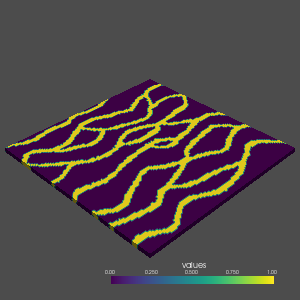

In [4]:
ti, ti_name = mps.trainingimages.strebelle(di=2, coarse3d=1)
print('TI shape:',ti.shape)

pl = pv.Plotter()
pl.add_mesh(ti)
pl.show(window_size=(300,300), jupyter_backend='static', interactive=True)

Using mps_snesim_tree installed in c:\Users\Misael Morales\AppData\Local\Programs\Python\Python39\lib\site-packages\mpslib\bin (scikit-mps in c:\Users\Misael Morales\AppData\Local\Programs\Python\Python39\lib\site-packages\mpslib\mpslib.py)


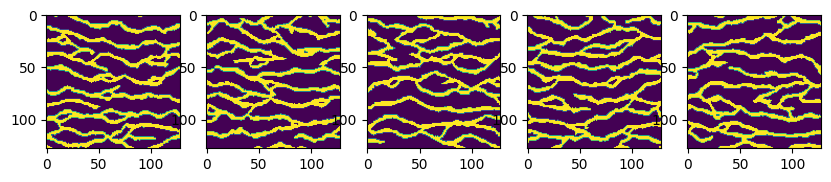

In [24]:
dims = [128, 128, 4]
nsim = 5
ncon = 51

snesim = mps.mpslib(method='mps_snesim_tree')
snesim.ti=ti
snesim.par['n_cond']=ncon
snesim.par['n_real']=nsim
snesim.par['simulation_grid_size'][0]=dims[0]
snesim.par['simulation_grid_size'][1]=dims[1]
snesim.par['simulation_grid_size'][2]=dims[2]
snesim.par['n_threads']=8
snesim.par['rseed']=411
snesim.par['debug_level']=-1
snesim.mps_snesim_par_write()
snesim.run()

plt.figure(figsize=(10,3))
for i in range(nsim):
    plt.subplot(1,5,i+1)
    plt.imshow(snesim.sim[i][:,:,0].T)
    plt.xticks([]); plt.yticks([])

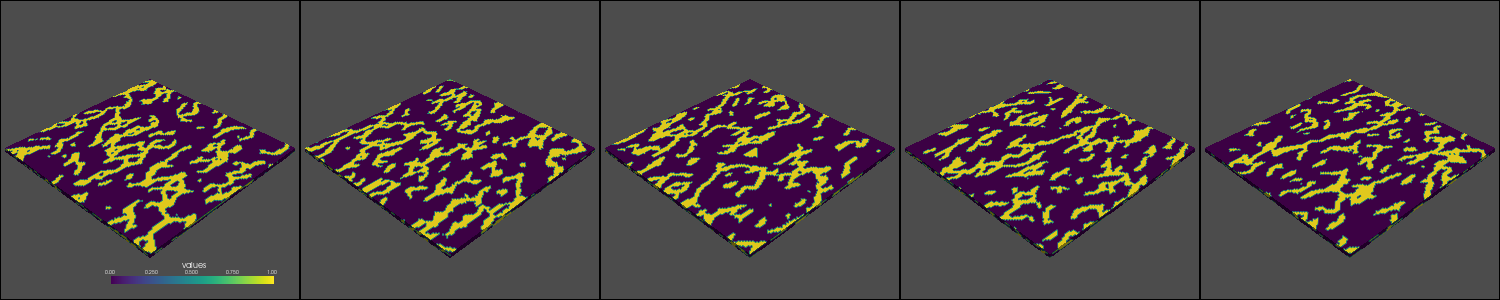

In [26]:
pl = pv.Plotter(shape=(1,5))
for i in range(5):
    for j in range(1):
        pl.subplot(j,i)
        pl.add_mesh(snesim.sim[i+j])
pl.show(window_size=(1500,300), jupyter_backend='static', interactive=True)

# END